# **Importando Librerias Básicas de Python**

In [ ]:
# Importando librerias básicas
import pandas as pd
import geopandas as gpd
import numpy as np



In [ ]:
dfcorales = pd.read_csv("Corales Veracruz.csv")
dfcorales = pd.DataFrame(dfcorales)

# **Importando Archivo CSV con registros de especímenes del orden Cheloniidae**

In [ ]:
# Importacion achivo csv con observaciones de ejemplares familia cheloniidae (Tortugas Marinas)
cheloniidae = pd.read_csv("cheloniidae.csv")
dfchelonidos = pd.DataFrame(cheloniidae)
#display(dfchelonidos)
#dfchelonidos.isna().sum()

# **Removiendo valores Nulos o NaN**

In [ ]:
# Se remueven los NAN en la columna "taxon_genus_name"
dfchelonidos = dfchelonidos.loc[dfchelonidos["taxon_genus_name"].notna()]
#dfchelonidos1.isna().sum()


# **Dataframe del archivo Cheloniidae**


In [ ]:
dfchelonidos.dtypes

,0
id,int64
observed_on,object
user_id,int64
latitude,float64
longitude,float64
taxon_phylum_name,object
taxon_class_name,object
taxon_order_name,object
taxon_family_name,object
taxon_genus_name,object


# **Convirtiendo "observed_on" objeto a cadena de tiempo**

In [ ]:
from datetime import date
from datetime import datetime
import time

In [ ]:
dfchelonidos["observed_on"] = pd.to_datetime(dfchelonidos["observed_on"])

In [ ]:
dfchelonidos1 = dfchelonidos

# **Insertando columnas para "Year" y "Month"**

In [ ]:

dfchelonidos1.insert(1,"Year", 3)
dfchelonidos1['Year'] = dfchelonidos1['observed_on'].dt.year
dfchelonidos1.insert(2, "Month", 1)
dfchelonidos1["Month"] = dfchelonidos1["observed_on"].dt.month
#dfchelonidos1.head()

# **Se separan las especies**

In [ ]:
dfchelonidos1.describe()

,id,Year,Month,observed_on,user_id,latitude,longitude
count,3.220000e+02,322.000000,322.000000,322,3.220000e+02,322.000000,322.000000
mean,8.682040e+07,2019.531056,6.409938,2020-01-09 18:06:42.484472064,2.348665e+06,19.889498,-96.327058
min,5.552830e+05,2007.000000,1.000000,2007-03-24 00:00:00,3.853000e+03,18.005020,-97.799078
25%,2.096800e+07,2018.000000,4.000000,2018-05-20 06:00:00,8.502600e+04,19.041485,-97.213413
50%,7.438455e+07,2019.000000,7.000000,2019-10-19 12:00:00,1.346550e+06,20.033715,-96.572456
75%,1.543041e+08,2022.000000,8.000000,2022-06-13 06:00:00,4.421974e+06,20.712820,-96.002179
max,2.345715e+08,2024.000000,12.000000,2024-07-28 00:00:00,8.290759e+06,22.379514,-94.032332
std,7.026009e+07,3.019247,2.544243,NaN,2.608908e+06,1.249098,1.087251


In [ ]:
# Se generan data frames independientes para cada género taxonómico

chelonia = dfchelonidos1[dfchelonidos1["taxon_genus_name"] == "Chelonia"]
lepidochelys = dfchelonidos1[dfchelonidos1["taxon_genus_name"] == "Lepidochelys"]
caretta = dfchelonidos1[dfchelonidos1["taxon_genus_name"] == "Caretta"]
eretmochelys = dfchelonidos1[dfchelonidos1["taxon_genus_name"] == "Eretmochelys"]

# **Se genera un Geopandas DataFrame**

In [ ]:
# Se Genera un GeoDataFrame para los diferentes generos taxonomicos
chelonia_points = gpd.points_from_xy(chelonia.longitude, chelonia.latitude)
gdfchelonia = gpd.GeoDataFrame(chelonia, geometry = chelonia_points)
#gdfchelonia

lepidochelys_points = gpd.points_from_xy(lepidochelys.longitude, lepidochelys.latitude)
gdflepidochelys = gpd.GeoDataFrame(lepidochelys, geometry = lepidochelys_points)
# gdflepidochelys

caretta_points = gpd.points_from_xy(caretta.longitude, caretta.latitude)
gdfcaretta = gpd.GeoDataFrame(caretta, geometry = caretta_points)
# gdfcaretta

eretmochelys_points = gpd.points_from_xy(eretmochelys.longitude, eretmochelys.latitude)
gdferetmochelys = gpd.GeoDataFrame(eretmochelys, geometry = eretmochelys_points)
# gdferetmochelys

In [ ]:
# Se genera un GeoDataFrame con el archivo de corales
dfcorales_points = gpd.points_from_xy(dfcorales.longitude, dfcorales.latitude)

gdfcorales = gpd.GeoDataFrame(dfcorales, geometry = dfcorales_points)
#gdfcorales.describe()


# **Se importan librerias de graficado**

In [ ]:
# Importar libreria de graficado
from matplotlib import pyplot as plt

# **Se importan archivo shp de los estados Unidos Mexicanos**

In [ ]:
# Importando shape file de los EUM y se asignan los nombres de cada entidad federativa

eum = gpd.read_file(f"dest23gw.shp")
eum["area"] = eum.area
eum["boundary"] = eum.boundary
eum["centroid"] = eum.centroid

entidad = ["Aguascalientes", "Baja California", "Baja California Sur", "Campeche", "Coahuila de Zaragoza", "Colima", "Chiapas"
, "Chihuahua", "CDMX", "Durango", "Guanajuato", "Guerrero", "Hidalgo", "Jalisco", "México", "Michoacán de Ocampo", "Morelos",
"Nayarit", "Nuevo León", "Oaxaca", "Puebla", "Querétaro","Quintana Roo", "San Luis Pototsí", "Sinaloa", "Sonora", "Tabasco",
"Tamaulipas", "Tlaxcala","Veracruz de Ignacio de la Llave", "Yucatán", "Zacatecas"]

estados = eum
a = 0
for a in range(32):
 estados.loc[a, ("provincia")] = entidad[a]
#display(estados)

# **Seleccionando la entidad federativa Veracruz de Ignacio de la Llave**

In [ ]:
# El archivo de corales comprende los arrecifes coralinos en la entidad federativa de Veracruz
veracruz = estados[estados.provincia == "Veracruz de Ignacio de la Llave"]

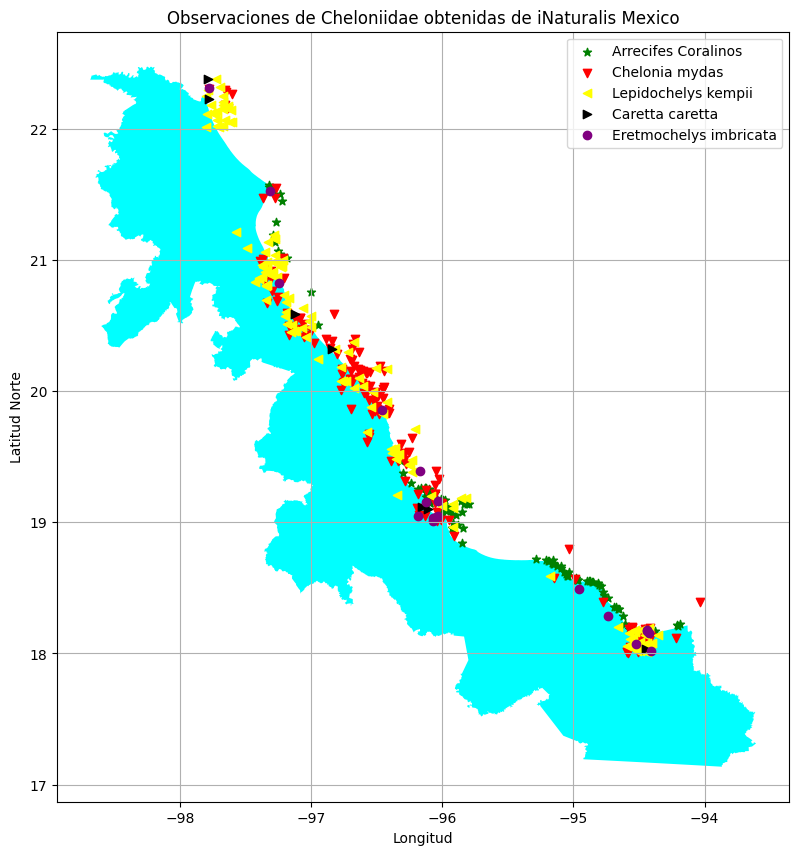

In [ ]:
# Se grafican en mapa los arrecifes de coral del estado de Veracruz
lienzo = veracruz.plot(figsize =(10, 10), color="cyan")
gdfcorales.plot(ax = lienzo, color = "green", marker = "*", label = "Arrecifes Coralinos")
gdfchelonia.plot(ax = lienzo, color ="red", marker = "v", label ="Chelonia mydas")
gdflepidochelys.plot(ax = lienzo, color = "yellow", marker = "<", label = "Lepidochelys kempii")
gdfcaretta.plot(ax = lienzo, color ="black", marker =">", label ="Caretta caretta")
gdferetmochelys.plot(ax = lienzo, color ="purple", marker = "o", label = "Eretmochelys imbricata")
lienzo.set_ylabel("Latitud Norte")
lienzo.set_xlabel("Longitud")
plt.title("Observaciones de Cheloniidae obtenidas de iNaturalis Mexico")
plt.legend()
plt.grid()
plt.savefig("Observaciones.png")
plt.show()



# **seaborn librerias**

In [ ]:
# Usando seaborn utilerias
import seaborn as sns



# **Histograma de las especies de Chelonidos**

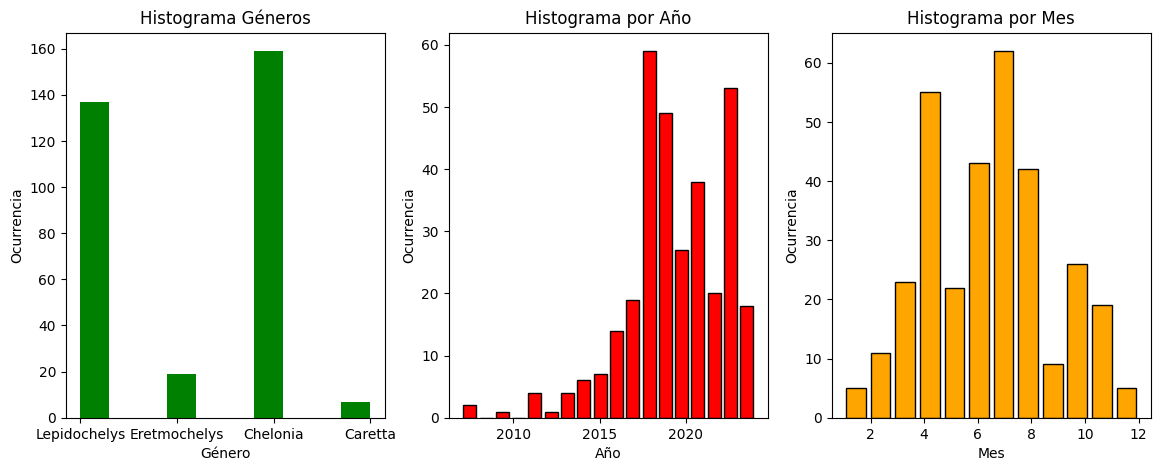

In [ ]:
# Tamaño del gráfico
#plt.figure(figsize=(6, 6))

fig, (ax0, ax1, ax2) = plt.subplots(nrows = 1, ncols = 3, figsize =(14,5))

# Crear un histograma
ax0.hist(dfchelonidos1['taxon_genus_name'], facecolor = "green")
ax1.hist(dfchelonidos1["Year"], facecolor = "red", bins = 18, edgecolor = "black", rwidth= 0.8)
ax2.hist(dfchelonidos1['Month'], facecolor = "orange", bins = 12, edgecolor = "black" , rwidth= 0.8)

# Título del grafico
ax0.set_title('Histograma Géneros')
ax0.set_xlabel('Género')
ax0.set_ylabel('Ocurrencia')

ax1.set_title('Histograma por Año')
ax1.set_xlabel('Año')
ax1.set_ylabel('Ocurrencia')

ax2.set_title("Histograma por Mes")
ax2.set_xlabel("Mes")
ax2.set_ylabel("Ocurrencia")
plt.savefig("Histograma.png")
plt.show()

# **Mapa de las observaciones Año / Mes**

Text(0.5, 1.0, 'Distribucion Chelonidae en Veracruz iNaturalist Mexico')

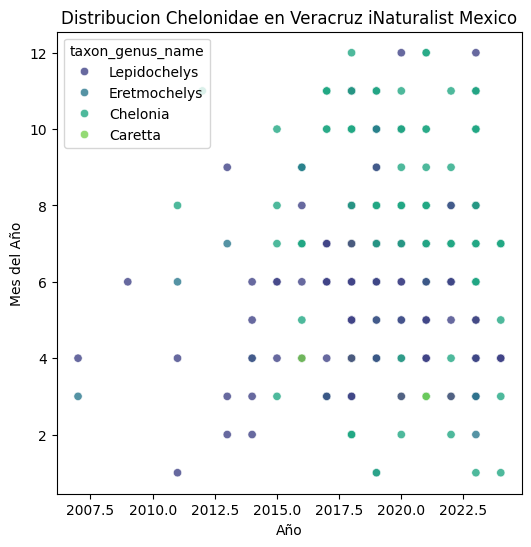

In [ ]:
plt.figure(figsize=(6, 6))
ax = sns.scatterplot(data=dfchelonidos1, x='Year', y='Month', hue='taxon_genus_name', palette='viridis', alpha=0.8)
ax.set(xlabel='Año', ylabel='Mes del Año')
plt.savefig("Dsitribucion.png")
plt.title("Distribucion Chelonidae en Veracruz iNaturalist Mexico")

# **Grafico Seaborn Pairplot de los datos del archivo**

<Figure size 1200x1600 with 0 Axes>

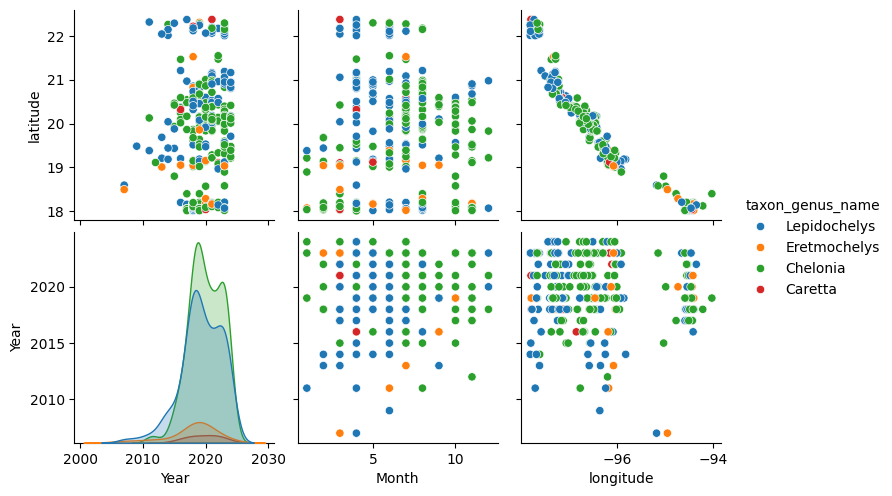

In [ ]:
plt.figure(figsize=(12, 16))
ax1 = sns.pairplot(dfchelonidos1, hue ="taxon_genus_name", x_vars=["Year", "Month", "longitude"], y_vars=["latitude", "Year"])
plt.savefig("Pairplot.png")

# **Opciones de regresiones en seaborn**

**Se opta por un análisis de los datos de "Year" y "latitude"**

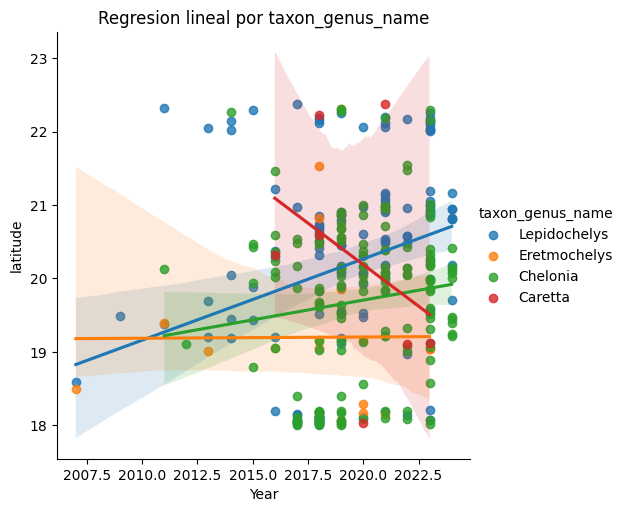

In [ ]:
ax = sns.lmplot(data= dfchelonidos1, x="Year", y="latitude", hue="taxon_genus_name")
plt.title("Regresion lineal por taxon_genus_name")
plt.savefig("Reglineal1.png")
plt.show()


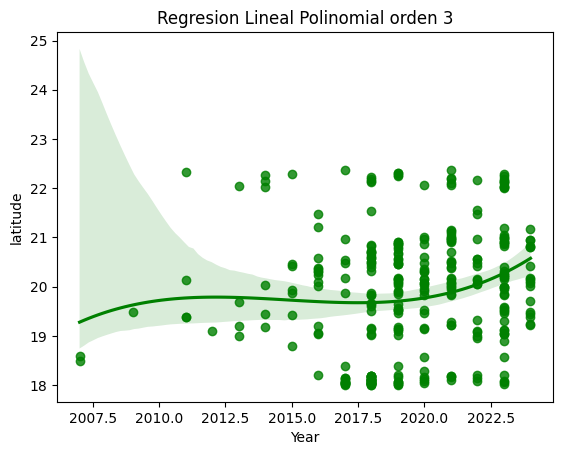

In [ ]:
sns.regplot(data= dfchelonidos1, x="Year", y="latitude", order = 3, color= "green")
plt.title("Regresion Lineal Polinomial orden 3")
plt.savefig("Polinonreg.png")
plt.show()

# **Cargando librerias de AI. Implementando la regresion lineal, polinomial, etcétera**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

# **Regresión Lineal**

In [ ]:
X = np.array(dfchelonidos1['Year']).reshape(-1, 1)
y = np.array(dfchelonidos1['latitude']).reshape(-1, 1)

# 80 % Datos para entrenamiento y 20 % para el test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_df = LinearRegression()
lin_df.fit(X_train, y_train)

y_pred = lin_df.predict(X_test)                                     # Predict Linear Model
accuracy_score = lin_df.score(X_test, y_test)                       # Accuracy score
print("Linear Regression Model Accuracy Score: " + "{:.1%}".format(accuracy_score))

from sklearn.metrics import mean_squared_error,r2_score

print("R2 Score: " +"{:.3}".format(r2_score(y_test, y_pred)));

Linear Regression Model Accuracy Score: 3.0%
R2 Score: 0.0303


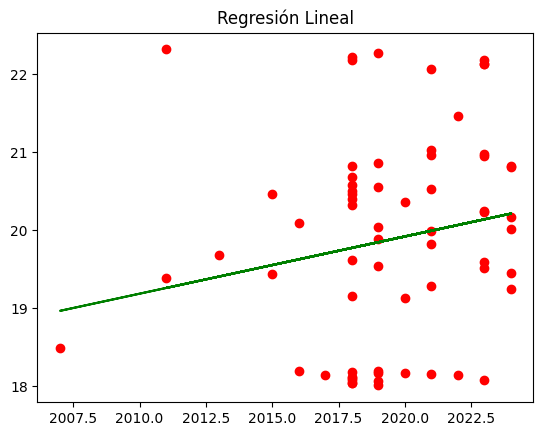

In [ ]:
plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, y_pred, color='g')
plt.title("Regresión Lineal")
plt.savefig("Reglineal2.png")
plt.show()

# **Regresion Lineal Multiple**

In [ ]:
mlin_df = LinearRegression()
mlin_df = mlin_df.fit(X_train, y_train)
mlin_df.intercept_       # constant b0
mlin_df.coef_            # variable coefficient

array([[0.07342474]])

In [ ]:
y_pred = mlin_df.predict(X_train)                                      # predict Multi linear Reg model
rmse = np.sqrt(mean_squared_error(y_train, mlin_df.predict(X_train)))
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.3}".format(r2_score(y_train, y_pred)));      # this is test error score

RMSE Score for Test set: 1.2
R2 Score for Test set: 0.0305


In [ ]:
# cross validation method is giving better and clear result

cross_val_score(mlin_df, X, y, cv=10, scoring = 'r2').mean()

-0.3748731049698884

In [ ]:
mlin_df.score(X_train, y_train)      # r2 value

0.030492579815917464

In [ ]:
np.sqrt(-cross_val_score(mlin_df,
                X_train,
                y_train,
                cv=10,
                scoring = 'neg_mean_squared_error')).mean()

1.2170443161570703

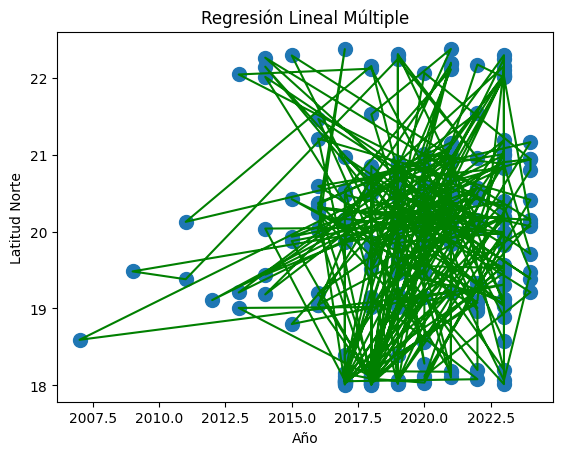

In [ ]:
# Finally draw figure of Multiple Linear Regression Model

import operator

plt.scatter(X_train, y_train, s=100)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,y_pred), key=sort_axis)
X_test, y_pred = zip(*sorted_zip)
plt.plot(X_train, y_train, color='g')
#plt.plot(X_train, y_pred, color ="green")
plt.xlabel("Año")
plt.ylabel("Latitud Norte")
plt.title("Regresión Lineal Múltiple")
plt.savefig("Multilineal.png")
plt.show()

# **Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state= 0)          # create  DecisionTreeReg with sklearn
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
dt_predict = dt_reg.predict(X_train)
#dt_predict.mean()

<ipython-input-68-060ab9508324>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)


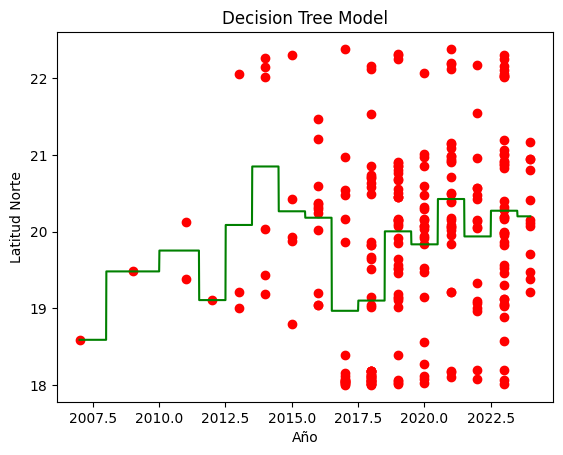

In [ ]:
plt.scatter(X_train,y_train, color="red")                           # scatter draw
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,dt_reg.predict(X_grid),color="g")                 # line draw
plt.xlabel("Año")
plt.ylabel("Latitud Norte")
plt.title("Decision Tree Model")
plt.savefig("Desiciontreechart.png")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_train,dt_predict))
r2 = r2_score(y_train,dt_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 1.1
R2 Score for Test set: 0.17


In [ ]:
# predicting a new value
A = 2012
# test the output by changing values, like 3750
y_pred = dt_reg.predict([[A]])

# print the predicted price
print("Predicción de Latitud Norte: % d\n"% y_pred, "Año:   ", A)

Predicción de Latitud Norte:  19
 Año:    2012


<ipython-input-72-17c74fe7f4db>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicción de Latitud Norte: % d\n"% y_pred, "Año:   ", A)


**Generando diagrama de flujo o árbol de desiciones**

In [ ]:
# import export_graphviz
from sklearn.tree import export_graphviz

# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(dt_reg, out_file ='Decisiontree.dot',
			feature_names =['Año'])


In [ ]:
import pydot

(graph,) = pydot.graph_from_dot_file('Decisiontree.dot')
graph.write_png('Decisiontree.png')

# **Regresion Polinomial**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_df = PolynomialFeatures(degree = 4)
transform_poly = poly_df.fit_transform(X_train)

linreg2 = LinearRegression()
linreg2.fit(transform_poly,y_train)

polynomial_predict = linreg2.predict(transform_poly)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_train,polynomial_predict))
r2 = r2_score(y_train,polynomial_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 1.2
R2 Score for Test set: 0.046


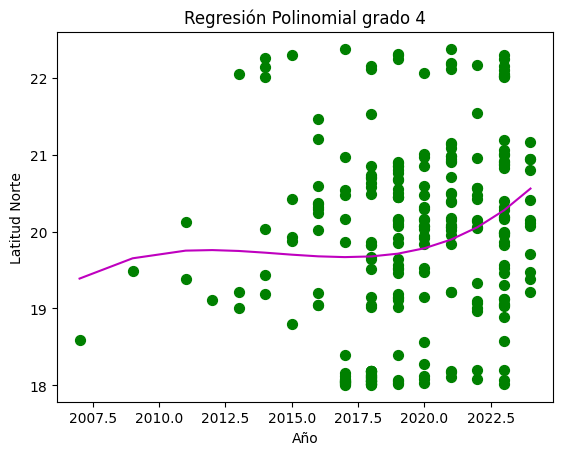

In [ ]:
plt.scatter(X_train, y_train, s=50, color = "green")
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,polynomial_predict), key=sort_axis)
X_train, polynomial_predict = zip(*sorted_zip)
plt.plot(X_train, polynomial_predict, color='m')
plt.xlabel("Año")
plt.ylabel("Latitud Norte")
plt.title("Regresión Polinomial grado 4")
plt.savefig("Polinomial.png")
plt.show()

# **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=5, random_state=0)
rf_reg.fit(X_train,y_train)
rf_predict = rf_reg.predict(X_train)
#rf_predict.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


<ipython-input-46-efe0b1bcaed6>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)


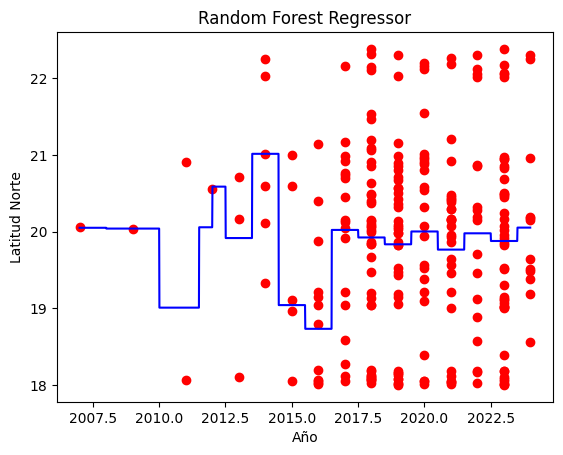

In [ ]:
plt.scatter(X_train,y_train, color="red")                           # scatter draw
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,rf_reg.predict(X_grid),color="b")                 # line draw
plt.xlabel("Año")
plt.ylabel("Latitud Norte")
plt.title("Random Forest Regressor")
plt.savefig("Randomforest.png")
plt.show()

In [ ]:
mse = np.sqrt(mean_squared_error(y_train,rf_predict))
r2 = r2_score(y_train,rf_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 1.2
R2 Score for Test set: 0.043


# **Algoritmo K-Means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


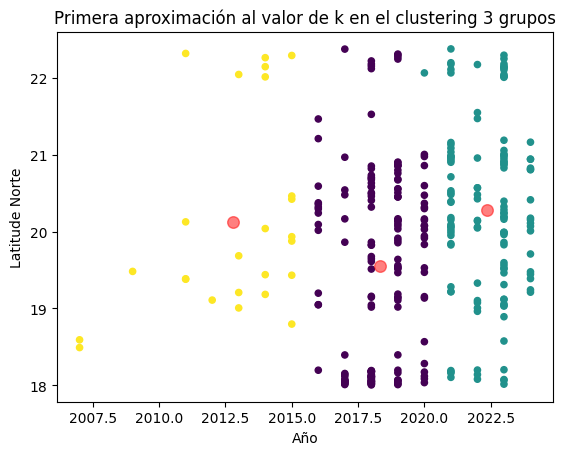

In [ ]:
#Algoritmo K-Means
from sklearn.cluster import KMeans

head = ["Year", "latitude"]

   # Nuevo DataFrame
df2 = dfchelonidos1[head]

# Cantidad de grupos a producir
groups=3

# Generación y entrenamiento del modelo.
kmeans = KMeans(n_clusters=groups).fit(df2)

# Uso del modelo con los datos.
y_kmeans = kmeans.predict(df2)

#Graficación de los resultados
plt.scatter(df2['Year'], df2['latitude'], c=y_kmeans, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=70, alpha=0.5)
plt.ylabel('Latitude Norte')
plt.xlabel('Año')
plt.title("Primera aproximación al valor de k en el clustering 3 grupos")
plt.savefig("Kmeans1st.png")
plt.show()

In [ ]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 0, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# **Centros de Aglomeramiento**

In [ ]:
   # Imprimiendo las coordenadas de "centers" obtenidos por el método K-Means
print("Coordenadas de centros de aglomeramiento seleccionado 3 grupos (Año y Latitud):", "\n", centers)

Coordenadas de centros de aglomeramiento seleccionado 3 grupos (Año y Latitud): 
 [[2018.32335329   19.55299184]
 [2022.37692308   20.2762124 ]
 [2012.8          20.12644468]]


# **Seleccion de K por el Elbow Method**

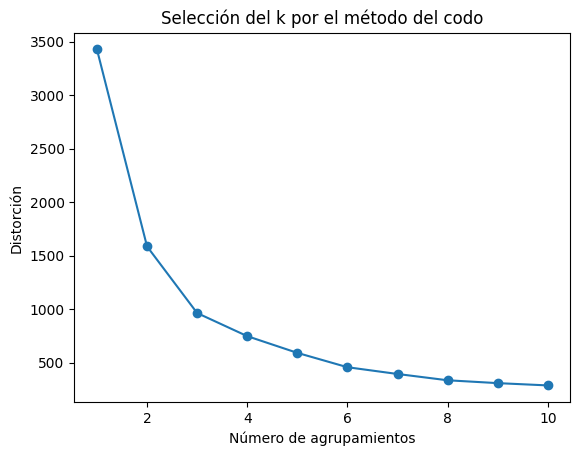

In [ ]:
# DataFrame df2 a arreglo lineal usando librerias Numpy
X0 = df2.to_numpy()

# Se calula el mejor k con el Algoritmo del Codo.
# calculamos la distorcion para diferentes k

# Se calcula el error cuadrado con k diferentes (distorción)
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X0)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Número de agrupamientos')
plt.ylabel('Distorción')
plt.title("Selección del k por el método del codo")
plt.savefig("Kmean_elbow.png")
plt.show()

# **Centros de agrupamientos despues de seleccion K-means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


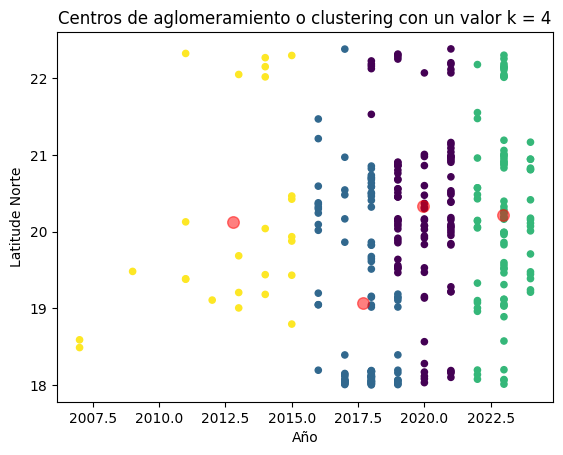

In [ ]:
# Cantidad de grupos a producir
groups=4

# Generación y entrenamiento del modelo.
kmeans = KMeans(n_clusters=groups).fit(df2)

# Uso del modelo con los datos.
y_kmeans = kmeans.predict(df2)

#Graficación de los resultados
plt.scatter(df2['Year'], df2['latitude'], c=y_kmeans, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=70, alpha=0.5)
plt.ylabel('Latitude Norte')
plt.xlabel('Año')
plt.title("Centros de aglomeramiento o clustering con un valor k = 4")
plt.savefig("Kmeans2d.png")
plt.show()

In [ ]:
print("Coordenadas de los centros de agrupamiento con un k =4 (Año y Latitud)", "\n", centers)

Coordenadas de los centros de agrupamiento con un k =4 (Año y Latitud) 
 [[2012.8          20.12644468]
 [2019.93333333   20.34035097]
 [2022.97802198   20.2110721 ]
 [2017.67326733   19.07240433]]


# **Agglomerative Clustering**

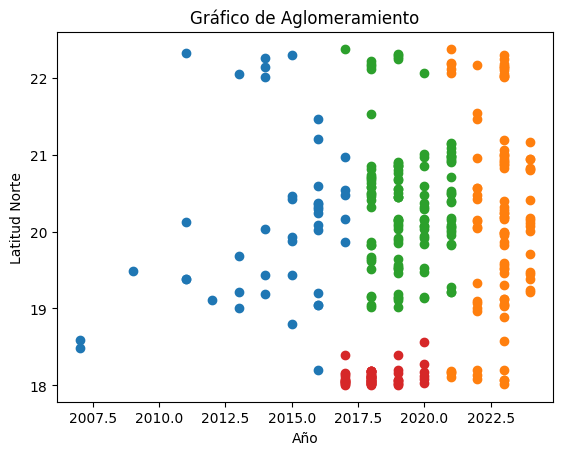

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# define the Agglomerative Clustering model
model = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat = model.fit_predict(X0)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = np.where(yhat == cluster)
 # create scatter of these samples
 plt.scatter(X0[row_ix, 0], X0[row_ix, 1])
# show the plot
plt.xlabel("Año")
plt.ylabel("Latitud Norte")
plt.title("Gráfico de Aglomeramiento")
plt.savefig("Clusteraglo.png")
plt.show()

# **Propagación de Afinidad en agrupamientos**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 19


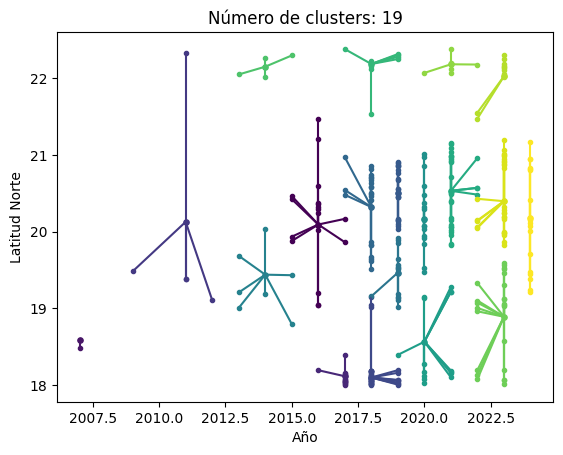

In [ ]:
# Affinity propagation
from sklearn import metrics
from sklearn.cluster import AffinityPropagation

af = AffinityPropagation(random_state=0)
af.fit(X0)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
centroids = af.cluster_centers_
n_clusters_ = len(cluster_centers_indices)
print("Estimated number of clusters: %d" % n_clusters_)

# plot del resultado



colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, n_clusters_)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X0[cluster_centers_indices[k]]
    plt.scatter(
        X0[class_members, 0], X0[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X0[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Número de clusters: %d" % n_clusters_)
plt.xlabel("Año")
plt.ylabel("Latitud Norte")
plt.savefig("Afinitycluster.png")
plt.show()




In [ ]:
display(centroids)

array([[2016.        ,   20.09333514],
       [2007.        ,   18.59238795],
       [2017.        ,   18.11792346],
       [2011.        ,   20.12794831],
       [2018.        ,   18.10142267],
       [2019.        ,   20.50839907],
       [2018.        ,   20.32091736],
       [2019.        ,   19.46657916],
       [2014.        ,   19.44047591],
       [2020.        ,   20.16581915],
       [2020.        ,   18.56772893],
       [2021.        ,   20.53207824],
       [2018.        ,   22.18332345],
       [2014.        ,   22.14812337],
       [2023.        ,   18.89283089],
       [2021.        ,   22.179694  ],
       [2023.        ,   22.02307634],
       [2023.        ,   20.39710079],
       [2024.        ,   20.17598433]])

# **Nearest Neighbors Classification**

Insertando columna en el DataFrame "chelonidos1" para asignar valor a cada taxon_genus_name:

1 = caretta  
2 = chelonia  
3 = eretmochelys  
4 = lepidochelys

In [ ]:
dfchelonidos1.insert(11, "target", 0)

dfchelonidos1.loc[(dfchelonidos1["taxon_genus_name"] == "Chelonia"), "target"]  = 1
dfchelonidos1.loc[(dfchelonidos1["taxon_genus_name"] == "Caretta"), "target"]  = 2
dfchelonidos1.loc[(dfchelonidos1["taxon_genus_name"] == "Eretmochelys"), "target"]  = 3
dfchelonidos1.loc[(dfchelonidos1["taxon_genus_name"] == "Lepidochelys"), "target"]  = 4


In [ ]:

from sklearn.model_selection import train_test_split

X = dfchelonidos1[[ "Year", "latitude"]]
y = dfchelonidos1.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.80, stratify=y, random_state=10)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

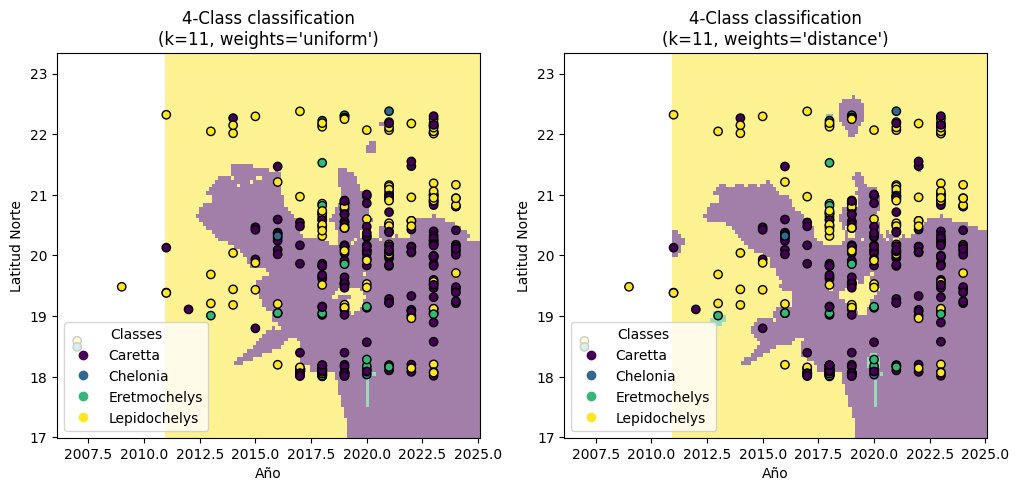

In [ ]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

target_names = ["Caretta" , "Chelonia", "Eretmochelys", "Lepidochelys"]

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
       # xlabel=dfchelonidos1.feature_names[4],
       # ylabel=dfchelonidos1.feature_names[3],
        xlabel = "Año",
        ylabel = "Latitud Norte",
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        #iris.target_names,
        #dfchelonidos1["taxon_genus_name"],
        target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"4-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()